In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from keras.callbacks import EarlyStopping,ModelCheckpoint
import matplotlib.pyplot as plt

In [2]:
data=datasets.load_digits()
x=data.images
y=data.target

In [3]:
x=x.reshape((x.shape[0],8,8,1))
x=x.astype('float32')/255
y=to_categorical(y)

In [4]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [5]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(8,8,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))


In [6]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [7]:
earlystop=EarlyStopping(monitor='val_loss',patience=10)
best_weights=ModelCheckpoint('best_weights.h5',save_best_only=True,monitor='val_loss',mode='min')

In [8]:
history=model.fit(x_train,y_train,epochs=50,batch_size=32,validation_data=(x_test,y_test),
                  callbacks=[earlystop,best_weights])

Epoch 1/50
45/45 [==============================] - 0s 4ms/step - loss: 2.2875 - accuracy: 0.1976 - val_loss: 2.2706 - val_accuracy: 0.1722
Epoch 2/50
45/45 [==============================] - 0s 2ms/step - loss: 2.2216 - accuracy: 0.4315 - val_loss: 2.1681 - val_accuracy: 0.4028
Epoch 3/50
45/45 [==============================] - 0s 2ms/step - loss: 2.0431 - accuracy: 0.5136 - val_loss: 1.9177 - val_accuracy: 0.6694


C:\Users\Student\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 4/50
45/45 [==============================] - 0s 2ms/step - loss: 1.7128 - accuracy: 0.6875 - val_loss: 1.5437 - val_accuracy: 0.7056
Epoch 5/50
45/45 [==============================] - 0s 2ms/step - loss: 1.3284 - accuracy: 0.7599 - val_loss: 1.1873 - val_accuracy: 0.8111
Epoch 6/50
45/45 [==============================] - 0s 2ms/step - loss: 1.0186 - accuracy: 0.8170 - val_loss: 0.9318 - val_accuracy: 0.8056
Epoch 7/50
45/45 [==============================] - 0s 2ms/step - loss: 0.7998 - accuracy: 0.8434 - val_loss: 0.7528 - val_accuracy: 0.8833
Epoch 8/50
45/45 [==============================] - 0s 2ms/step - loss: 0.6570 - accuracy: 0.8622 - val_loss: 0.6193 - val_accuracy: 0.8889
Epoch 9/50
45/45 [==============================] - 0s 2ms/step - loss: 0.5643 - accuracy: 0.8866 - val_loss: 0.5492 - val_accuracy: 0.8694
Epoch 10/50
45/45 [==============================] - 0s 2ms/step - loss: 0.4880 - accuracy: 0.8949 - val_loss: 0.4999 - val_accuracy: 0.8750
Epoch 11/50
45/45 [

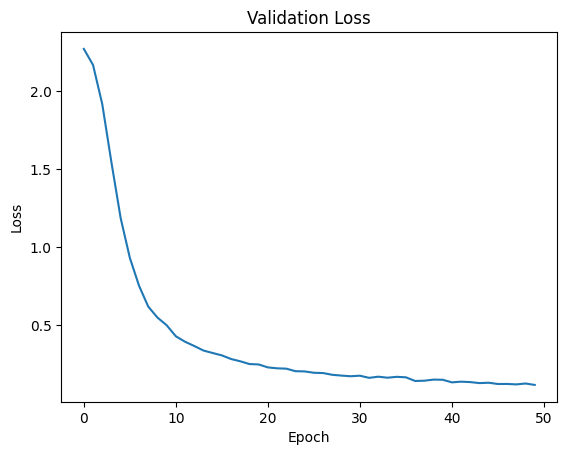

In [9]:
plt.plot(history.history['val_loss'])
plt.title('Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

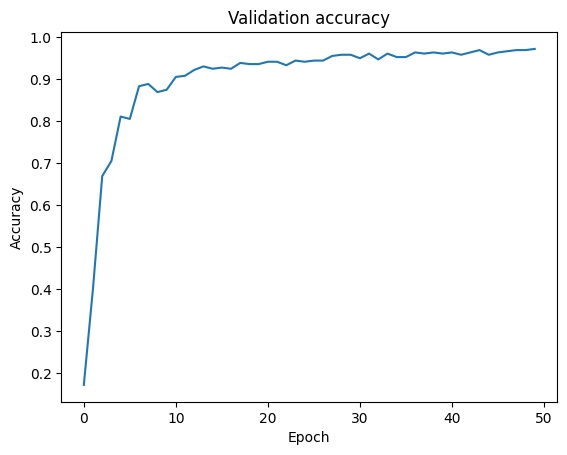

In [10]:
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [11]:
model.load_weights("best_weights.h5")

In [12]:
test_loss,test_acc=model.evaluate(x_test,y_test,verbose=0)
print("Test Loss:",test_loss)
print("Test Accuracy:",test_acc)

Test Loss: 0.11733775585889816
Test Accuracy: 0.9722222089767456
